# Dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Attribute Information
* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [223]:
df = pd.read_csv('../input/haberman.csv', names=['Patient_Age', 'Year_of_Operation', 'Axil_Nodes_Found', 'Survival_Status'])
df.head()

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Data Analysis

In [224]:
# High-level
df.describe()

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


> **Observation:** The Average age is 30

### Dataset balance

It's imbalanced data set.

In [225]:
# About 225 survived (lived 5 years or longer after operation) out of 306
df[df['Survival_Status'] == 1].shape[0]

225

In [226]:
# About 81 did not survive (lived less than 5 years after operation) out of 306
df[df['Survival_Status'] == 2].shape[0]

81

## BiVariant Analysis

### 2D Scatter Plot

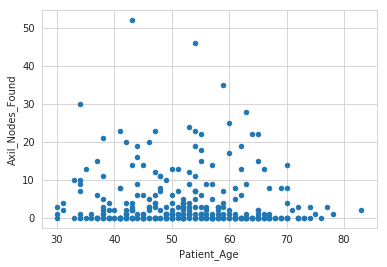

In [227]:
df.plot(y='Axil_Nodes_Found', x='Patient_Age',kind='scatter');
plt.show()

> **Observation:** For Most of the Patients The No.of axillary nodes is '0'

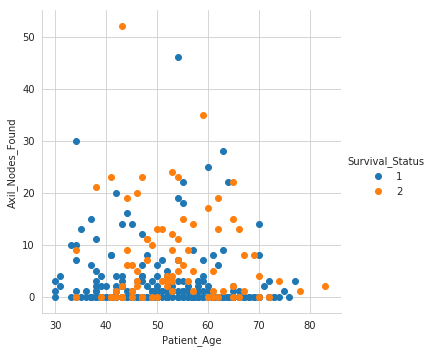

In [228]:
sns.set_style("whitegrid")

sns.FacetGrid(df,hue='Survival_Status',size=5) \
    .map(plt.scatter,'Patient_Age','Axil_Nodes_Found') \
    .add_legend()
plt.show()

> **Observation:** We cant classify through this features with this type of plot.

### PairPlot

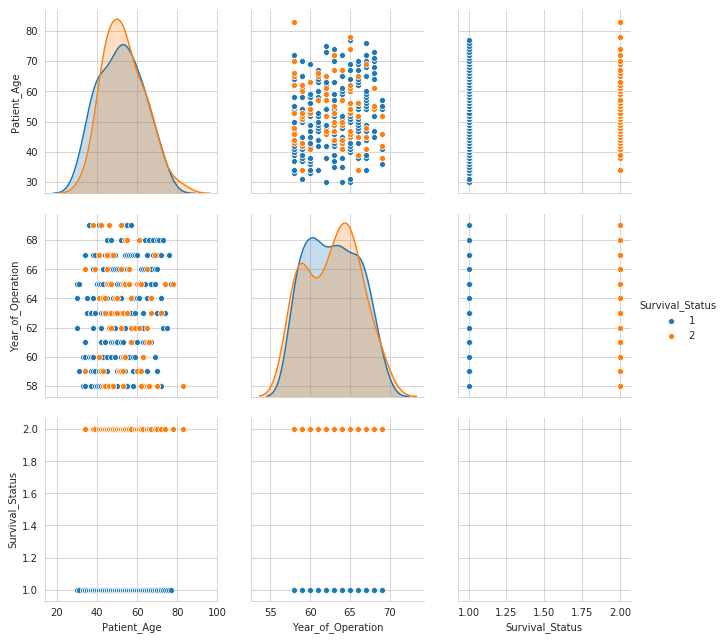

In [229]:
sns.set_style("whitegrid");

sns.pairplot(df,hue='Survival_Status',size=3,vars=["Patient_Age", "Year_of_Operation","Survival_Status"])
plt.show()


> **Note:** With above 3 plots it's difficult to classify the Survival_Status.

## Univariant Analysis

### PDF

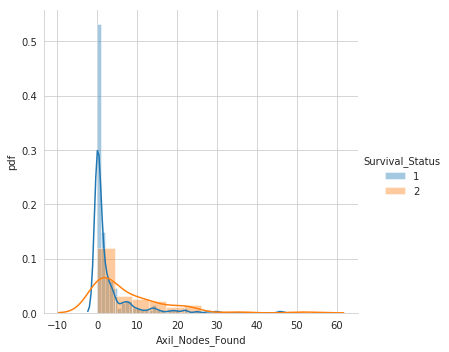

In [230]:
sns.FacetGrid(df, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Axil_Nodes_Found") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

> **Observation:** Spread is more for status 1 than status 2. More number of patients of status 1 has less number of Axillary Nodes that may indicate an inverse relation between Axillary nodes and Survival Status.

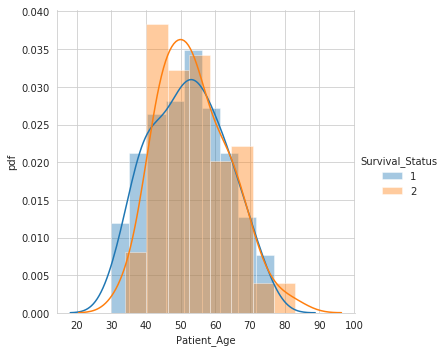

In [231]:
sns.FacetGrid(df, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Patient_Age") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

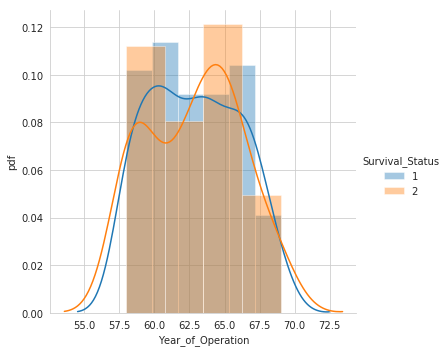

In [232]:
sns.FacetGrid(df, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Year_of_Operation") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

In [233]:
status_1 = df[df['Survival_Status'] == 1]
status_1.describe()

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [234]:
status_2 = df[df['Survival_Status'] == 2]
status_2.describe()

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


> **Observation:**
> 
>  * Status 1: Mean of number of axillary nodes -> 2.8~ std -> 5.9~ 
>  * Status 2: Mean of number of axillary nodes -> 7.5~ std -> 9.1~ 
> 
> That implies surival rate is inversely propotional to the number of axillary nodes.

### PDF CDF

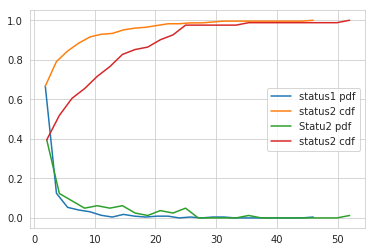

In [235]:
counts, bin_edges = np.histogram(status_1['Axil_Nodes_Found'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status1 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')


counts, bin_edges = np.histogram(status_2['Axil_Nodes_Found'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Statu2 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')
plt.legend()
plt.show()

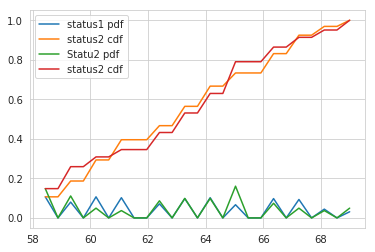

In [236]:
counts, bin_edges = np.histogram(status_1['Year_of_Operation'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status1 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')


counts, bin_edges = np.histogram(status_2['Year_of_Operation'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Statu2 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')
plt.legend()
plt.show()

### Box Plot

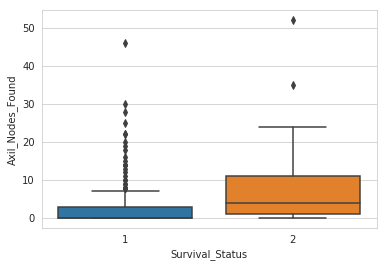

In [237]:
sns.boxplot(x='Survival_Status',y='Axil_Nodes_Found', data=df)
plt.show()

> **Observation:**
> 
>  * status_1 -> About 50 percentile people have Axillary nodes 0 and 75 percentile have about 3~ axillary nodes.
>  * status_2 -> About 50 percentile people have Axillary nodes more than 4~ and 25 percentile patients have 1-3 nodes.

### Violin Plot

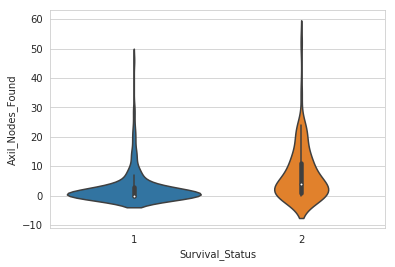

In [238]:
sns.violinplot(x='Survival_Status',y='Axil_Nodes_Found', data=df, size=8)
plt.show()

## MultiVariant Analysis


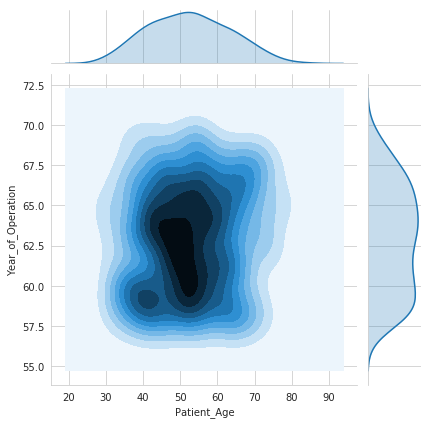

In [239]:
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Year_of_Operation', data = df)
plt.show()

> There are more number of patients undergone operation during the year 1960 - 1964 period and between ages 45 - 55

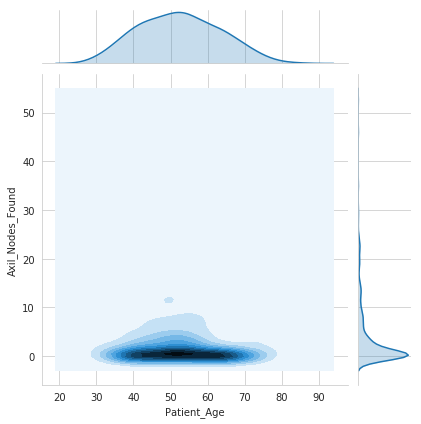

In [240]:
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Axil_Nodes_Found', data=df)
plt.show()

> **Conclusion:** From PDF,Box plot and Means of no.of axillary nodes, It is evident that if there are more no.of axillary nodes the patient may tend to die with in 5 years of operation.

# Model

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.ticker import FormatStrFormatter

In [242]:
# Train / Test data split

array = df.values
X = array[:,:3]
Y = array[:,3]
validation_size = 0.30
seed = 10
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
test_size=validation_size, random_state=seed)

In [243]:
# Test options and evaluation metric

num_folds = 20
num_instances = len(X_train)
seed = 10
scoring = 'accuracy'

In [244]:
# Spot Check Algorithms

algorithms = []
algorithms.append(('LR', LogisticRegression(solver='lbfgs')))
algorithms.append(('LDA', LinearDiscriminantAnalysis()))
algorithms.append(('KNN', KNeighborsClassifier()))
algorithms.append(('CART', DecisionTreeClassifier()))
algorithms.append(('NB', GaussianNB()))
algorithms.append(('SVM', SVC(gamma='scale')))
algorithms.append(('NN', MLPClassifier()))
algorithms.append(('RFC', RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
for name, algorithm in algorithms:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(algorithm, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.738182 (0.100848)
LDA: 0.738182 (0.100848)
KNN: 0.710000 (0.121828)
CART: 0.598636 (0.113665)
NB: 0.747273 (0.099445)
SVM: 0.715909 (0.111299)
NN: 0.724091 (0.117067)
RFC: 0.668636 (0.132848)


In [245]:
# Make predictions on validation dataset
knn =  GaussianNB()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.782608695652174
[[66  6]
 [14  6]]
              precision    recall  f1-score   support

           1       0.82      0.92      0.87        72
           2       0.50      0.30      0.37        20

   micro avg       0.78      0.78      0.78        92
   macro avg       0.66      0.61      0.62        92
weighted avg       0.75      0.78      0.76        92



# Test on unseen data

In [246]:
# Applying the trained model to unseen data

df_data = {'Age': [30,34, 35,38,40,50,43,45,34,34,46,50,45,38,42],
           'Year os operations': [65,64,63,64,66,64,64,64,63,63,64,67,64,65,67],
           'axillary nodes detected': [4,10,15,8,40,25,23,40,3,40,3,1,4,2,4]}
new_df = pd.DataFrame(df_data)
new_df

,Age,Year os operations,axillary nodes detected
0,30,65,4
1,34,64,10
2,35,63,15
3,38,64,8
4,40,66,40
5,50,64,25
6,43,64,23
7,45,64,40
8,34,63,3
9,34,63,40


In [247]:
prediction = knn.predict(new_df)

In [248]:
print("Prediction of data survival status: {}".format(prediction))

Prediction of data survival status: [1 1 2 1 2 2 2 2 1 2 1 1 1 1 1]
